In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install seaborn==0.9.0

In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/StockX-Data-Contest-2019.csv'
pwd = '/content/StockX-Data-Contest-2019.csv'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization

In [5]:
dat = pd.read_csv(pwd)
print(len(dat))
dat.head(10)

99956


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island
5,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220.0,2/11/17,8.5,Michigan
6,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220.0,12/17/16,11.0,California
7,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220.0,4/29/17,10.0,New York
8,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,4/29/17,11.0,Kansas
9,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220.0,4/29/17,11.0,Florida


**Missing Value Check**

In [6]:
print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
col_names = list(dat.columns.values)
for name in col_names:
  print('total number of NaN in the column ',name,' : ',dat[name].isnull().sum())

total rows contain NaN:  0
total number of NaN in the column  Order Date  :  0
total number of NaN in the column  Brand  :  0
total number of NaN in the column  Sneaker Name  :  0
total number of NaN in the column  Sale Price  :  0
total number of NaN in the column  Retail Price  :  0
total number of NaN in the column  Release Date  :  0
total number of NaN in the column  Shoe Size  :  0
total number of NaN in the column  Buyer Region  :  0


In [7]:
print('Brand Names: ', list(set(dat['Brand'].values)))

Brand Names:  [' Yeezy', 'Off-White']


In [42]:
dat_yeezy = dat.loc[dat.Brand==' Yeezy',:]
print(len(dat_yeezy))

yeezy_profit = dat_yeezy['Sale Price'].values-dat_yeezy['Retail Price'].values
yeezy_profit_rate = yeezy_profit/dat_yeezy['Retail Price'].values*100
dates = dat_yeezy['Order Date'].values

months = []
for dt in dates:
  d = dt.split('/')
  months.append(d[0]+'/'+d[2])

month = ['9/17','10/17','11/17','12/17','1/18','2/18','3/18','4/18',\
         '5/18','6/18','7/18','8/18','9/18','10/18','11/18','12/18','1/19','2/19',]

monthly_profit = []
monthly_sale_num = []
Months = []
rates = []
categ = []

for mon in month:
  pft = [yeezy_profit[i] for i,val in enumerate(months) if months[i]==mon]
  monthly_profit.append(sum(pft))
  monthly_sale_num.append(len(pft))

  rate = np.array([yeezy_profit_rate[i] for i,val in enumerate(months) if months[i]==mon])
  Months.append(mon)
  rates.append(sum(rate<50))
  categ.append('<50%')
  Months.append(mon)
  rates.append(sum(rate<=100)-sum(rate<50))
  categ.append('50%,100%')
  Months.append(mon)
  rates.append(sum(rate>100))
  categ.append('>100%')
  
d = {'Months':Months,'# of Rates':rates,'Categ':categ}
profit_rate_dat = pd.DataFrame(data=d)
profit_rate_dat.Months = pd.Categorical(profit_rate_dat.Months,\
                                        categories=month,ordered=True)

72162


In [17]:
rate = np.array([yeezy_profit_rate[i] for i,val in enumerate(months) if months[i]==month[5]])
print(sum(rate<100))
print(sum(rate<=200)-sum(rate<100))
print(sum(rate>200))

1585
328
180


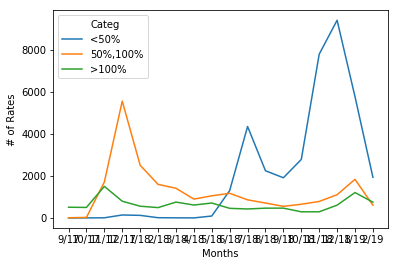

In [44]:
sb.lineplot(x='Months',y='# of Rates',hue='Categ',data=profit_rate_dat)

plt.show()

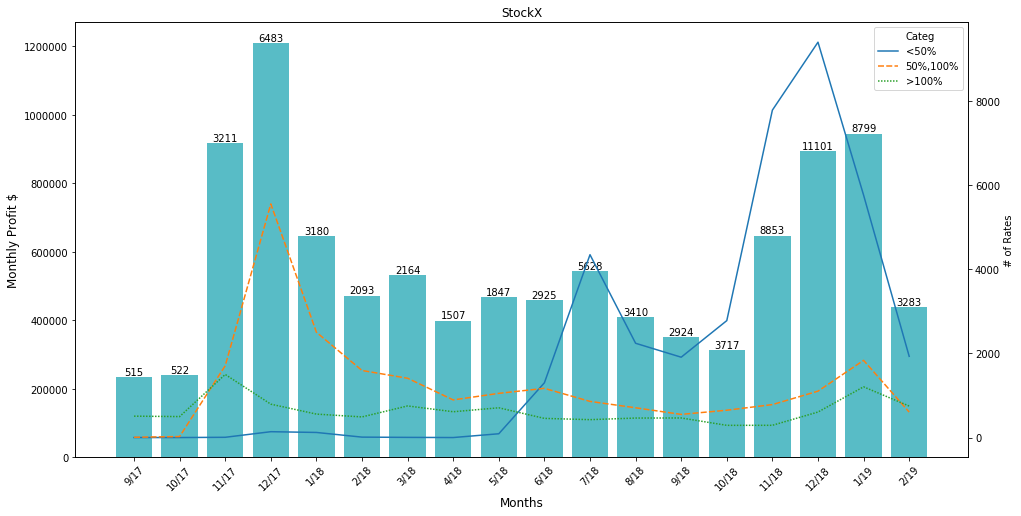

In [55]:
color = sb.color_palette() # Set up the color choices

fig, ax = plt.subplots(figsize=(16,8))
ax.grid(False)
sb.barplot(month,monthly_profit,alpha=0.8,color=color[9])
plt.title("StockX")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Monthly Profit $', fontsize=12)
plt.xlabel('Months', fontsize=12)

#adding the text labels
rects = ax.patches
labels = monthly_sale_num

for t in range(18):
    rect = rects[t]
    label = labels[t]
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

ax2 = ax.twinx()    
ax2.grid(False)
sb.lineplot(x='Months',y='# of Rates',hue='Categ',style='Categ',data=profit_rate_dat)

plt.show()  